In [26]:
from PIL import Image, ImageDraw
import math

In [27]:
pattern_0 = [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (1, 0), (1, 6), 
             (2, 0), (2, 6), (3, 0), (3, 6), (4, 1), (4, 2), (4, 3), 
             (4, 4), (4, 5)]

In [28]:
pattern_1 = [(1, 1), (1, 6), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), 
             (2, 5), (2, 6), (3, 6)]

In [29]:
pattern_2 = [(0, 1), (0, 6), (1, 0), (1, 5), (1, 6), (2, 0), (2, 4), 
             (2, 6), (3, 0), (3, 3), (3, 6), (4, 1), (4, 2), (4, 6)]

In [30]:
pattern_3 = [(0, 0), (0, 5), (1, 0), (1, 6), (2, 0), (2, 2), (2, 6), 
             (3, 0), (3, 1), (3, 3), (3, 6), (4, 0), (4, 4), (4, 5)]

In [31]:
pattern_4 = [(0, 3), (0, 4), (1, 2), (1, 4), (2, 1), (2, 4), (3, 0), 
             (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (4, 4)]

In [32]:
pattern_5 = [(0, 0), (0, 1), (0, 2), (0, 5), (1, 0), (1, 2), (1, 6), 
             (2, 0), (2, 2), (2, 6), (3, 0), (3, 2), (3, 6), (4, 0), 
            (4, 0), (4, 3), (4, 4), (4, 5)]

In [33]:
pattern_6 = [(0, 2), (0, 3), (0, 4), (0, 5), (1, 1), (1, 3), (1, 6), 
             (2, 0), (2, 3), (2, 6), (3, 0), (3, 3), (3, 6), (4, 4), 
             (4, 5)]

In [34]:
pattern_7 = [(0, 0), (1, 0), (1, 4), (1, 5), (1, 6), (2, 0), (2, 3), 
             (3, 0), (3, 2), (4, 0), (4, 1)]

In [35]:
pattern_8 = [(0, 1), (0, 2), (0, 4), (0, 5), (1, 0), (1, 3), (1, 6), 
             (2, 0), (2, 3), (2, 6), (3, 0), (3, 3), (3, 6), (4, 1), 
            (4, 2), (4, 4), (4, 5)]

In [36]:
pattern_9 = [(0, 1), (0, 2), (1, 0), (1, 3), (1, 6), (2, 0), (2, 3), 
             (2, 6), (3, 0), (3, 3), (3, 5), (4, 1), (4, 2), (4, 3),
            (4, 4)]

In [37]:
def _image_(pattern):
    size = (5, 7)
    color_white = (255, 255, 255)
    color_black = (0, 0, 0)
    pattern_image = Image.new("RGB", size, color_white)  
    draw = ImageDraw.Draw(pattern_image)
    for coord in pattern:
        draw.point(coord, color_black)
    del draw
    return pattern_image

In [38]:
def _bigger_(image):
    scale = 10
    return image.resize((image.size[0] * scale, image.size[0] * scale), resample = 0)

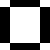

In [39]:
pattern_image_0 = _image_(pattern_0)
_bigger_(pattern_image_0)

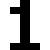

In [40]:
pattern_image_1 = _image_(pattern_1)
_bigger_(pattern_image_1)

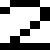

In [41]:
pattern_image_2 = _image_(pattern_2)
_bigger_(pattern_image_2)

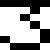

In [42]:
pattern_image_3 = _image_(pattern_3)
_bigger_(pattern_image_3)

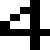

In [43]:
pattern_image_4 = _image_(pattern_4)
_bigger_(pattern_image_4)

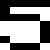

In [44]:
pattern_image_5 = _image_(pattern_5)
_bigger_(pattern_image_5)

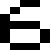

In [45]:
pattern_image_6 = _image_(pattern_6)
_bigger_(pattern_image_6)

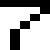

In [46]:
pattern_image_7 = _image_(pattern_7)
_bigger_(pattern_image_7)

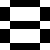

In [47]:
pattern_image_8 = _image_(pattern_8)
_bigger_(pattern_image_8)

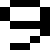

In [48]:
pattern_image_9 = _image_(pattern_9)
_bigger_(pattern_image_9)

In [49]:
pattern_images = [pattern_image_0, pattern_image_1, pattern_image_2, pattern_image_3, pattern_image_4, 
                  pattern_image_5, pattern_image_6, pattern_image_7, pattern_image_8, pattern_image_9]

In [51]:
test = [(0, 5), (1, 1), (1, 6), (2, 0), (2, 6), (3, 0), (3, 3), (3, 6), (4, 1), (4, 2), (4, 4), (4, 5)]

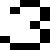

In [61]:
test_image = _image_(test)
_bigger_(test_image)

In [62]:
test_image_pix = test_image.load() 

In [63]:
pattern_images_pix = []
for pattern in pattern_images:
    pattern_images_pix.append(pattern.load())

In [67]:
counts = []
size = test_image.size

for pattern_pix in pattern_images_pix:
    res = 0
    for i in range(size[0]):
        for j in range(size[1]):
            if pattern_pix[i, j] == (0, 0, 0):
                res += 1
    counts.append(res)
counts

[16, 10, 14, 14, 14, 17, 15, 11, 17, 15]

In [68]:
correl = []
n = -1
for pattern_pix in pattern_images_pix:
    n += 1
    res = 0
    for i in range(size[0]):
        for j in range(size[1]):
            if test_image_pix[i, j] == (0, 0, 0):
                if pattern_pix[i, j] == (255, 255, 255):
                    res -= 1
                elif pattern_pix[i, j] == (0, 0, 0):
                    res += 1
    correl.append(res / counts[n])

In [69]:
correl

[0.5,
 -0.2,
 0.2857142857142857,
 0.42857142857142855,
 -0.2857142857142857,
 0.23529411764705882,
 0.5333333333333333,
 -0.36363636363636365,
 0.5882352941176471,
 0.26666666666666666]

In [73]:
maximum = correl[0]
max_num = 0
for i in range(len(correl)):
    if correl[i] > maximum:
        maximum = correl[i]
        max_num = i
max_num, maximum

(8, 0.5882352941176471)